Process Data

In [1]:
train_link = "/mnt/hdd1tb/traffic-signs-data/train.p"
valid_link = "/mnt/hdd1tb/traffic-signs-data/valid.p"
test_link = "/mnt/hdd1tb/traffic-signs-data/test.p"

In [2]:
import pickle 

with open(train_link, mode='rb') as f:
    train_data = pickle.load(f)
with open(valid_link, mode='rb') as f:
    valid_data = pickle.load(f)
with open(test_link, mode='rb') as f:
    test_data = pickle.load(f)
    

In [3]:
train_data, train_data.items()

({'coords': array([[  6,   5,  21,  20],
         [  6,   6,  22,  22],
         [  5,   6,  22,  23],
         ...,
         [ 17,  15, 178, 155],
         [ 17,  15, 183, 160],
         [ 20,  18, 211, 184]], dtype=uint8),
  'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
  'features': array([[[[ 28,  25,  24],
           [ 27,  24,  23],
           [ 27,  24,  22],
           ...,
           [ 32,  28,  24],
           [ 31,  27,  25],
           [ 31,  27,  26]],
  
          [[ 29,  26,  25],
           [ 27,  25,  23],
           [ 27,  25,  23],
           ...,
           [ 32,  28,  24],
           [ 31,  27,  24],
           [ 30,  27,  25]],
  
          [[ 28,  26,  26],
           [ 27,  25,  23],
           [ 26,  25,  23],
           ...,
           [ 32,  28,  24],
           [ 31,  27,  24],
           [ 30,  27,  25]],
  
          ...,
  
          [[ 27,  24,  23],
           [ 28,  25,  24],
           [ 30,  25,  24],
           ...,
           [ 27,  

In [4]:
train_data['coords'], train_data['coords'].shape

(array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 (34799, 4))

In [5]:
train_data['labels'].shape

(34799,)

In [6]:
# sizes la chieu dai, rong cua anh
train_data['sizes'], train_data['sizes'].shape

(array([[ 26,  25],
        [ 27,  27],
        [ 27,  28],
        ...,
        [194, 169],
        [201, 175],
        [230, 201]], dtype=uint8),
 (34799, 2))

In [7]:
valid_data['coords'], valid_data['coords'].shape

(array([[  6,   5,  22,  20],
        [  6,   5,  22,  20],
        [  6,   5,  23,  21],
        ...,
        [ 10,   8,  99,  90],
        [ 10,  11, 112, 108],
        [ 13,  12, 138, 125]], dtype=uint8),
 (4410, 4))

In [8]:
# coords la toa do bounding box [x1,y1,x2,y2] cua cac anh
test_data['coords'], test_data['coords'].shape

(array([[ 6,  5, 48, 49],
        [ 5,  5, 36, 40],
        [ 6,  6, 43, 47],
        ...,
        [ 6,  6, 24, 24],
        [ 5,  6, 43, 44],
        [ 6,  5, 27, 26]], dtype=uint8),
 (12630, 4))

In [9]:
trainX = train_data['features']
labels = train_data['labels']
trainX.shape, labels.shape

((34799, 32, 32, 3), (34799,))

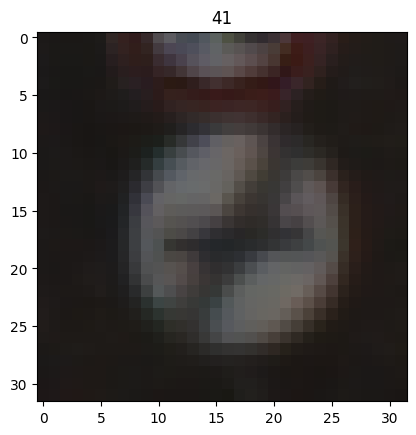

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.title(labels[0])
plt.imshow(trainX[0])


Text(0.5, 1.0, '15')

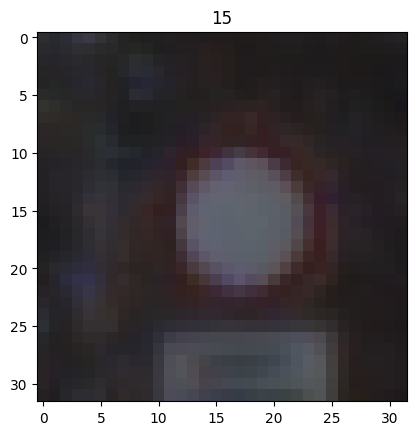

In [11]:
plt.imshow(trainX[30000])
plt.title(labels[30000])

In [12]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}


Text(0.5, 1.0, 'No vehicles')

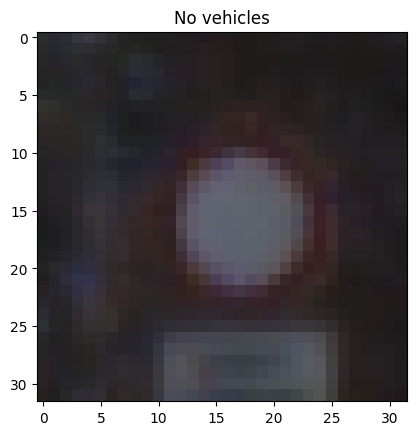

In [13]:
plt.imshow(trainX[30000])
plt.title(classNames[labels[30000]])

In [14]:
import torch

trainX_2 = torch.tensor(trainX)
labels_2 = torch.tensor(labels)
indices = torch.randperm(trainX.shape[0])
shuffed_trainX = trainX_2[indices]
shuffed_labels_2 = labels_2[indices]


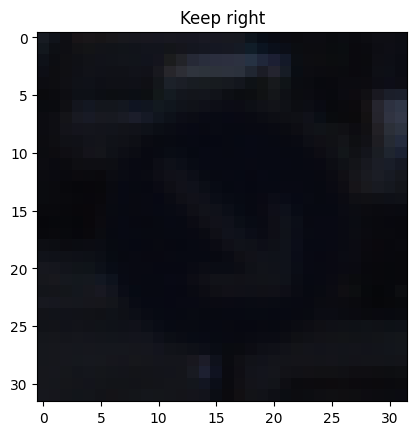

In [15]:
plt.imshow(shuffed_trainX[1324])
plt.title(classNames[int(shuffed_labels_2[1324])])
plt.show()

In [16]:
validX = valid_data['features']
valid_labels = valid_data['labels']
testX = test_data['features']
test_labels = test_data['labels']

validX.shape, valid_labels.shape, testX.shape, test_labels.shape

((4410, 32, 32, 3), (4410,), (12630, 32, 32, 3), (12630,))

In [17]:
trainX_2 = trainX_2 / 255.
validX = validX / 255.
# testX = testX / 255.


#testX = testX / 255.

Chuyen thanh dang One Hot Encoding cho label
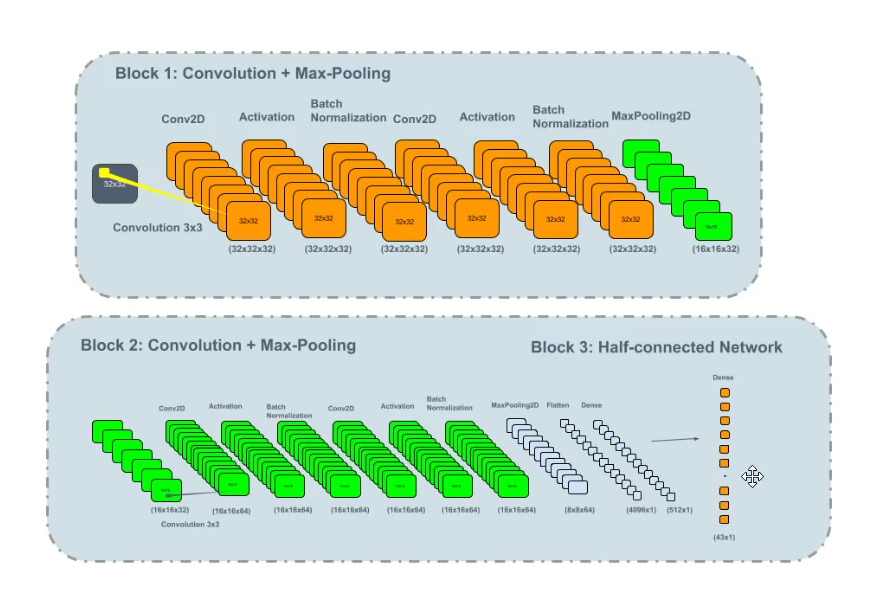

In [18]:
from torchvision import transforms
# Chuan hoa ve 0 --> 1
transform = transforms.Compose([
   
    transforms.ToTensor()   
])
labels_22 = torch.randint(0, len(classNames), (labels_2.shape[0],))
#One hot encoding labels 
labels_2 = torch.nn.functional.one_hot(labels_22, num_classes=len(classNames))
labels_2.shape

torch.Size([34799, 43])

In [19]:
print(torch.where(labels_2[0] == 1))
labels_2[0]

(tensor([19]),)


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
from torch import nn
import torchsummary
architecture = nn.Sequential(
    nn.Conv2d(3,32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(32),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(32,64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(64),
    
    nn.Conv2d(64,64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(64), 
    nn.MaxPool2d(2,2),    
    
    nn.Flatten(),
    nn.Linear(4096, 512),
    nn.ReLU(),
    nn.BatchNorm1d(512),
    
    nn.Linear(512, len(classNames)),
    nn.Softmax(dim=1)
        
)
torchsummary.summary(architecture, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
         MaxPool2d-4           [-1, 32, 16, 16]               0
            Conv2d-5           [-1, 64, 16, 16]          18,496
              ReLU-6           [-1, 64, 16, 16]               0
       BatchNorm2d-7           [-1, 64, 16, 16]             128
            Conv2d-8           [-1, 64, 16, 16]          36,928
              ReLU-9           [-1, 64, 16, 16]               0
      BatchNorm2d-10           [-1, 64, 16, 16]             128
        MaxPool2d-11             [-1, 64, 8, 8]               0
          Flatten-12                 [-1, 4096]               0
           Linear-13                  [-1, 512]       2,097,664
             ReLU-14                  [

In [25]:
augumentation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.RandomRotation(18),
    transforms.RandomResizedCrop(32, scale=(0.85, 1.0)),
    transforms.transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=0, translate=(0.2,0.2))
])

In [29]:
trainX.shape

torch.Size([34799, 3, 32, 32])

In [31]:
from  torch.utils.data import TensorDataset, DataLoader
learning_rate = 0.01
epochs = 10 

batch_size = 64 
model = architecture
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

#trainX = trainX.transpose(0,2,3,1)
trainX = torch.stack([augumentation(image) for image in trainX])
print(trainX.shape)
train_dataset = TensorDataset(torch.FloatTensor(trainX), torch.LongTensor(labels))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
val_dataset = TensorDataset(torch.FloatTensor(validX), torch.LongTensor(valid_labels))
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
# Training loop
train_losses = []
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    
    # Create batches using DataLoader
    
    for inputs, targets in train_loader:
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    # Validation phase
    model.eval()
    running_val_loss = 0.0
    
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_val_loss += loss.item()
    
    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    
    print(f'Epoch [{epoch+1}/{epochs}] Loss: {epoch_loss:.4f}')

# Plot training loss
plt.plot(train_losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

torch.Size([34799, 3, 32, 32])


RuntimeError: Given groups=1, weight of size [32, 3, 3, 3], expected input[64, 32, 32, 3] to have 3 channels, but got 32 channels instead